<a href="https://colab.research.google.com/github/divrofsyhftr/Segmentasi-K-Means-menggunakan-Google-Colab/blob/main/K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Library
###### import pandas as pd: Mengimpor library pandas dan memberikan alias pd.
###### from sklearn.cluster import KMeans:Library ini digunakan untuk memanipulasi dan menganalisis data menggunakan struktur data DataFrame.
###### import matplotlib.pyplot as plt : DataFrame memungkinkan kita untuk bekerja dengan data tabular atau visualisasi data.


In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#2. Tahap Pengumpulan dan Pre-Processing Data

#### Sebelum melakukan pre-processing Data, perlu dilakukan tahap pengumpulan data.

Pada tahap ini data yang digunakan diperoleh dari Kaggle *https://www.kaggle.com/datasets/aryashah2k/credit-card-customer-data*.
Data berisi kumpulan data informasi Kartu Kredit Pelanggan.

Dibawah dapat dilihat persebaran datanya.


In [13]:
# Ganti path dengan path file Excel Anda di Google Drive
data = pd.read_excel('/content/Credit Card 300.xlsx')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,20000,2,1,1,0
1,2,38414,5000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [14]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,53933.956667,12870.000000,3.203333,1.576667,2.993333,5.613333
std,86.746758,25522.406672,8830.990203,1.762292,1.480347,1.707730,2.872512
min,1.000000,11412.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,75.750000,33356.000000,8000.000000,2.000000,0.000000,2.000000,4.000000
50%,150.500000,52754.000000,12000.000000,3.000000,1.000000,3.000000,6.000000
75%,225.250000,74564.250000,16000.000000,4.000000,2.000000,4.000000,8.000000
max,300.000000,99596.000000,100000.000000,7.000000,5.000000,12.000000,10.000000


#3. Tahap Cleaning Data

###Pada tahap ini akan dilakukan pengecekan keseluruhan data apakah terdapat missing value. Hal ini perlu dilakukan karena missing value dapat menyebabkan dalam perhitungan tidak efektif.


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                300 non-null    int64
 1   Customer Key         300 non-null    int64
 2   Avg_Credit_Limit     300 non-null    int64
 3   Total_Credit_Cards   300 non-null    int64
 4   Total_visits_bank    300 non-null    int64
 5   Total_visits_online  300 non-null    int64
 6   Total_calls_made     300 non-null    int64
dtypes: int64(7)
memory usage: 16.5 KB


In [16]:
print(data.isnull().sum())

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [17]:
# Pilih kolom yang akan digunakan untuk clustering
#Type your code here
X = data.iloc[:, [3, 2]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Total_Credit_Cards', 'Avg_Credit_Limit']))

     Total_Credit_Cards  Avg_Credit_Limit
0                     2             20000
1                     3              5000
2                     7             50000
3                     5             30000
4                     6            100000
..                  ...               ...
295                   6             10000
296                   4             11000
297                   7              7000
298                   6             12000
299                   6              9000

[300 rows x 2 columns]


# 4. Tahap Pemodelan Data

### Tahap ini terdiri dari pemodelan data untuk mencari kombinasi data yangdapat memprediksi hasil yang diinginkan. Setelah dilakukan preprocessing dan data cleaning, selanjutnya menggunakan metode Elbow untuk memprediksi jumlah klaster. Dalam proses ini metode Elbow akan menguji nilai k satu persatu untuk mencari nilai k terbaik. Jumlah cluster yang akan diuji adalah k=1 sampai dengan k=10.



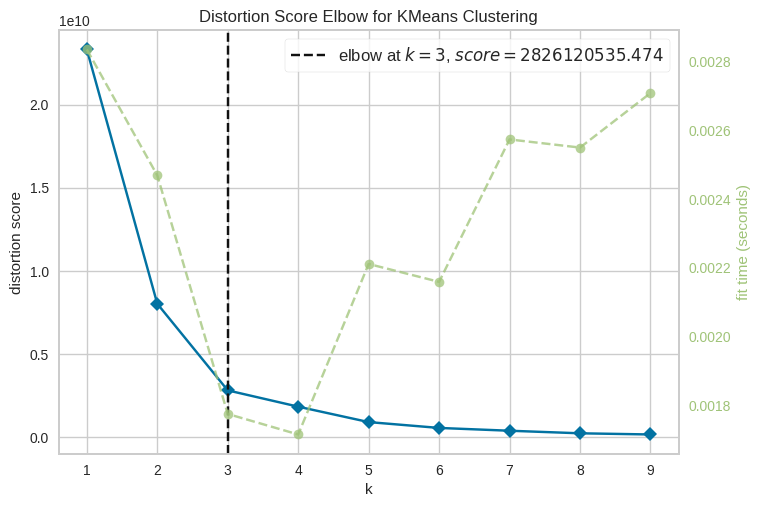

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [19]:
from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        # Use integer indexing for numpy arrays
        mean_freq = cluster_data[:, 0].mean()
        mean_purchase = cluster_data[:, 1].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Total_Credit_Cards: {mean_freq:.2f}")
        print(f"Avg_Credit_Limit: {mean_purchase:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Total_Credit_Cards: 3.10
Avg_Credit_Limit: 12963.41

Cluster 2:
Total_Credit_Cards: 5.50
Avg_Credit_Limit: 100000.00

Cluster 3:
Total_Credit_Cards: 3.14
Avg_Credit_Limit: 7609.38


# Menghitung Silhouette Score

### Silhouette score adalah salah satu metrik yang digunakan untuk mengevaluasi kualitas hasil pengelompokan pada algoritma k-means.

In [20]:
from sklearn.metrics import silhouette_score

# Menghitung silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.58


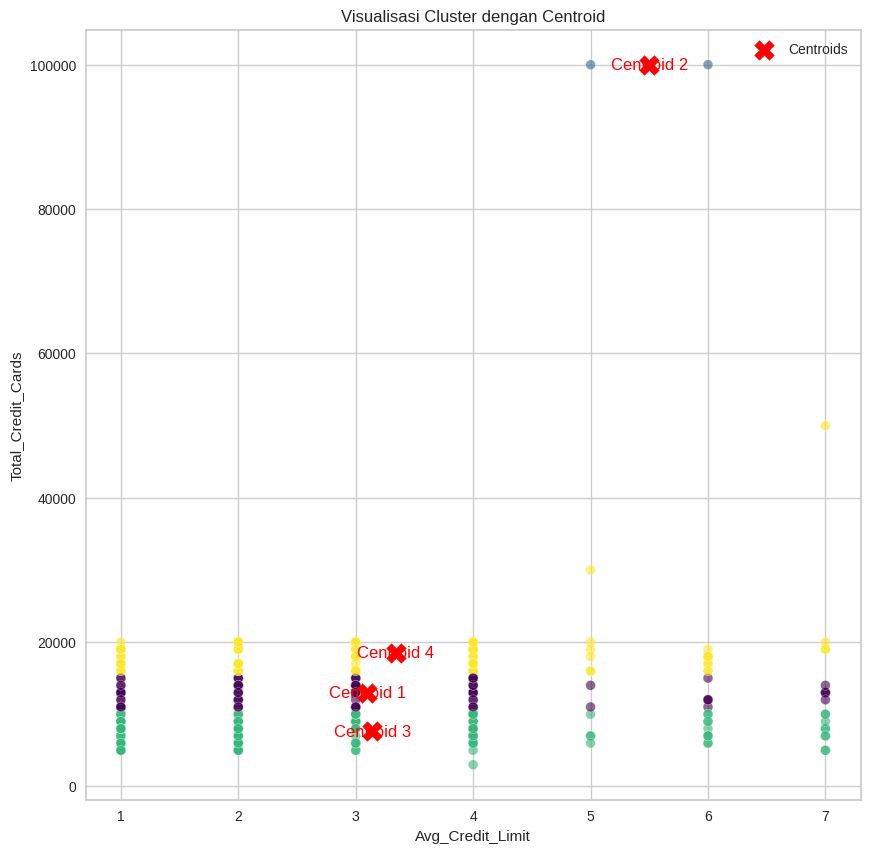

Nilai Centroids:
Centroid 1: Total_Credit_Cards = 3.10, Avg_Credit_Limit = 12963.41
Centroid 2: Total_Credit_Cards = 5.50, Avg_Credit_Limit = 100000.00
Centroid 3: Total_Credit_Cards = 3.14, Avg_Credit_Limit = 7609.38
Centroid 4: Total_Credit_Cards = 3.34, Avg_Credit_Limit = 18454.55


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(10, 10))

# Plot data
# Access numpy array elements using integer indexing
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
# X[:, 0] selects all rows (:) and the first column (0), which corresponds to 'Avg_Credit_Limit'
# X[:, 1] selects all rows (:) and the second column (1), which corresponds to 'Total_Credit_Cards'


# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Total_Credit_Cards = {centroid[0]:.2f}, Avg_Credit_Limit = {centroid[1]:.2f}")

# Analisis Clustering Pelanggan Berdasarkan Limit Kredit dan Jumlah Kartu Kredit

## Analisis Karakteristik Setiap Cluster

### Cluster 1
- **Rata-rata Limit Kredit (Avg_Credit_Limit):** 12,963.41  
- **Rata-rata Jumlah Kartu Kredit (Total_Credit_Cards):** 3.10  
- **Karakteristik:**  
  - Pelanggan dengan limit kredit yang tergolong sedang.  
  - Memiliki jumlah kartu kredit yang relatif sedikit.  
  - Kemungkinan merepresentasikan kelompok pelanggan dengan pengeluaran terkontrol atau segmen pasar menengah.  

### Cluster 2
- **Rata-rata Limit Kredit (Avg_Credit_Limit):** 100,000.00  
- **Rata-rata Jumlah Kartu Kredit (Total_Credit_Cards):** 5.50  
- **Karakteristik:**  
  - Pelanggan premium dengan limit kredit sangat tinggi.  
  - Memiliki jumlah kartu kredit paling banyak.  
  - Kemungkinan besar merupakan segmen pelanggan dengan tingkat penghasilan tinggi, gaya hidup mewah, dan kemampuan pengeluaran tinggi.  

### Cluster 3
- **Rata-rata Limit Kredit (Avg_Credit_Limit):** 7,609.38  
- **Rata-rata Jumlah Kartu Kredit (Total_Credit_Cards):** 3.14  
- **Karakteristik:**  
  - Pelanggan dengan limit kredit rendah.  
  - Jumlah kartu kredit sedikit.  
  - Mewakili segmen pelanggan dengan penghasilan lebih rendah atau baru memasuki sistem keuangan formal, seperti pelajar atau pekerja muda.  

### Cluster 4
- **Rata-rata Limit Kredit (Avg_Credit_Limit):** 18,454.55  
- **Rata-rata Jumlah Kartu Kredit (Total_Credit_Cards):** 3.34  
- **Karakteristik:**  
  - Pelanggan dengan limit kredit moderat ke tinggi.  
  - Jumlah kartu kredit berada di atas rata-rata.  
  - Mungkin merupakan kelompok pelanggan mapan secara finansial tetapi tidak masuk ke kategori premium.  

---

## Interpretasi Hasil Clustering

1. **Kesesuaian dengan Ekspektasi dan Logika Bisnis:**  
   - **Cluster 2** menunjukkan perbedaan signifikan dengan pelanggan premium, sesuai ekspektasi bahwa pelanggan dengan banyak kartu kredit juga memiliki limit kredit yang tinggi.  
   - **Cluster 3** mewakili segmen entry-level, yang logis untuk pelanggan dengan limit kredit rendah dan sedikit kartu kredit.  
   - **Cluster 1 dan Cluster 4** berada di tengah, tetapi **Cluster 4** tampaknya sedikit lebih unggul dari segi penghasilan atau pengeluaran.  

2. **Pola yang Ditemukan:**  
   - Jumlah kartu kredit meningkat seiring dengan kenaikan limit kredit, menunjukkan hubungan positif antara kapasitas keuangan pelanggan dan kepercayaan penyedia kartu kredit.  

---

## Peluang Segmen Pasar

- **Cluster 3:**  
  - Potensi untuk program edukasi keuangan.  
  - Penawaran kartu kredit dengan limit lebih tinggi untuk meningkatkan loyalitas pelanggan.  

- **Cluster 4:**  
  - Peluang untuk memasarkan produk tambahan seperti asuransi atau investasi.  

---

## Rekomendasi Bisnis

1. **Segmentasi Produk:**  
   - Sesuaikan penawaran dengan kebutuhan tiap segmen.  
   - Reward program eksklusif untuk **Cluster 2**.  
   - Edukasi atau peningkatan limit kredit bertahap untuk **Cluster 3**.  

2. **Strategi Loyalitas:**  
   - Fokus pada **Cluster 1 dan Cluster 4**, karena mereka berpotensi menjadi pelanggan premium di masa depan.  

---

Hasil clustering ini memberikan wawasan yang dapat digunakan untuk menyusun strategi pemasaran yang lebih spesifik sesuai dengan karakteristik pelanggan. Data ini dapat digunakan untuk memperkuat loyalitas pelanggan sekaligus mengoptimalkan penawaran produk ke segmen pasar yang tepat.




In [22]:
#eksport data Simpan hasilnya ke dalam file Excel.

import pandas as pd

# Assuming 'df' is your DataFrame and 'labels' are your cluster labels
# Create a new DataFrame with the original data and the cluster labels
data_with_clusters = data.copy()  # Create a copy to avoid modifying the original DataFrame
data_with_clusters['Cluster'] = labels

# Export the DataFrame to a CSV file
data_with_clusters.to_excel('/content/hasil_cluster.xlsx', index=False)